# Plotting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob

In [5]:
# Create figures directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Helper function to get the log.csv file for a specific experiment prefix
def get_log_file(exp_prefix, base_dir="exp"):
    # Looks for a directory that contains the prefix (e.g., cartpole_rtg_na)
    search_pattern = os.path.join(base_dir, f"*{exp_prefix}*", "log.csv")
    matches = glob.glob(search_pattern)
    if not matches:
        print(f"Warning: No log.csv found for {exp_prefix}")
        return None
    # Assuming one match per prefix for simplicity
    return matches[0]

# Helper function to plot a set of experiments
def plot_experiments(experiments, title, filename, y_col="Eval_AverageReturn", x_col="Train_EnvstepsSoFar"):
    plt.figure(figsize=(10, 6))
    plotted_any = False
    
    for label, exp_prefix in experiments.items():
        log_file = get_log_file(exp_prefix)
        if log_file:
            df = pd.read_csv(log_file)
            if x_col in df.columns and y_col in df.columns:
                plt.plot(df[x_col], df[y_col], label=label, linewidth=2)
                plotted_any = True
            else:
                print(f"Columns {x_col} or {y_col} not found in {log_file}")
                
    if plotted_any:
        plt.title(title, fontsize=14)
        plt.xlabel("Environment Steps", fontsize=12)
        plt.ylabel(y_col.replace("_", " "), fontsize=12)
        plt.legend(loc="lower right")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(f"figures/{filename}.png", dpi=300)
        print(f"Saved figures/{filename}.png")
    else:
        print(f"Skipped {filename} - no valid data found.")
    plt.close()

def main():
    # 1. CartPole Small Batch
    cartpole_small = {
        "Default": "CartPole-v0_cartpole_sd",
        "Reward-to-Go (RTG)": "CartPole-v0_cartpole_rtg_sd",
        "Advantage Norm (NA)": "CartPole-v0_cartpole_na_sd",
        "RTG + NA": "CartPole-v0_cartpole_rtg_na_sd"
    }
    plot_experiments(cartpole_small, "CartPole Small Batch (b=1000)", "cartpole_small_batch")

    # 2. CartPole Large Batch
    cartpole_large = {
        "Default": "CartPole-v0_cartpole_lb_sd",
        "Reward-to-Go (RTG)": "CartPole-v0_cartpole_lb_rtg_sd",
        "Advantage Norm (NA)": "CartPole-v0_cartpole_lb_na_sd",
        "RTG + NA": "CartPole-v0_cartpole_lb_rtg_na_sd"
    }
    plot_experiments(cartpole_large, "CartPole Large Batch (b=4000)", "cartpole_large_batch")

    # 3. HalfCheetah Eval Return
    cheetah_eval = {
        "No Baseline": "HalfCheetah-v4_cheetah_sd",
        "With Baseline": "HalfCheetah-v4_cheetah_baseline_sd"
    }
    plot_experiments(cheetah_eval, "HalfCheetah Evaluation Return", "cheetah_eval_return")

    # 4. HalfCheetah Baseline Loss
    cheetah_loss = {
        "Baseline Network": "HalfCheetah-v4_cheetah_baseline_sd"
    }
    # Note: Depending on how you logged it, the column might be 'Baseline Loss' or 'Baseline_Loss'
    plot_experiments(cheetah_loss, "HalfCheetah Baseline Loss", "cheetah_baseline_loss", y_col="Baseline Loss")

    # 5. LunarLander GAE Lambda Sweep
    lunar_lander_gae = {
        "Lambda = 0": "LunarLander-v2_lunar_lander_lambda0_sd",
        "Lambda = 0.95": "LunarLander-v2_lunar_lander_lambda0.95_sd",
        "Lambda = 0.98": "LunarLander-v2_lunar_lander_lambda0.98_sd",
        "Lambda = 0.99": "LunarLander-v2_lunar_lander_lambda0.99_sd",
        "Lambda = 1": "LunarLander-v2_lunar_lander_lambda1_sd"
    }
    plot_experiments(lunar_lander_gae, "LunarLander GAE Sweep", "lunar_lander_gae")

    # 6. InvertedPendulum: Tuned vs Default
    # NOTE: You will need to change the prefix of the tuned one depending on what you named it!
    pendulum = {
        "Default": "InvertedPendulum-v4_pendulum_sd",
        "Tuned": "InvertedPendulum-v4_pendulum_rtg_baseline_na_gae_99_bs_1000"
    }
    plot_experiments(pendulum, "InvertedPendulum Performance", "pendulum_comparison")

if __name__ == "__main__":
    main()

Saved figures/cartpole_small_batch.png
Saved figures/cartpole_large_batch.png
Saved figures/cheetah_eval_return.png
Saved figures/cheetah_baseline_loss.png
Saved figures/lunar_lander_gae.png
Saved figures/pendulum_comparison.png


Saved figures/cartpole_small_batch.png
Saved figures/cartpole_large_batch.png
Saved figures/cheetah_eval_return.png
Saved figures/cheetah_baseline_loss.png
Saved figures/lunar_lander_gae.png
Saved figures/pendulum_comparison.png


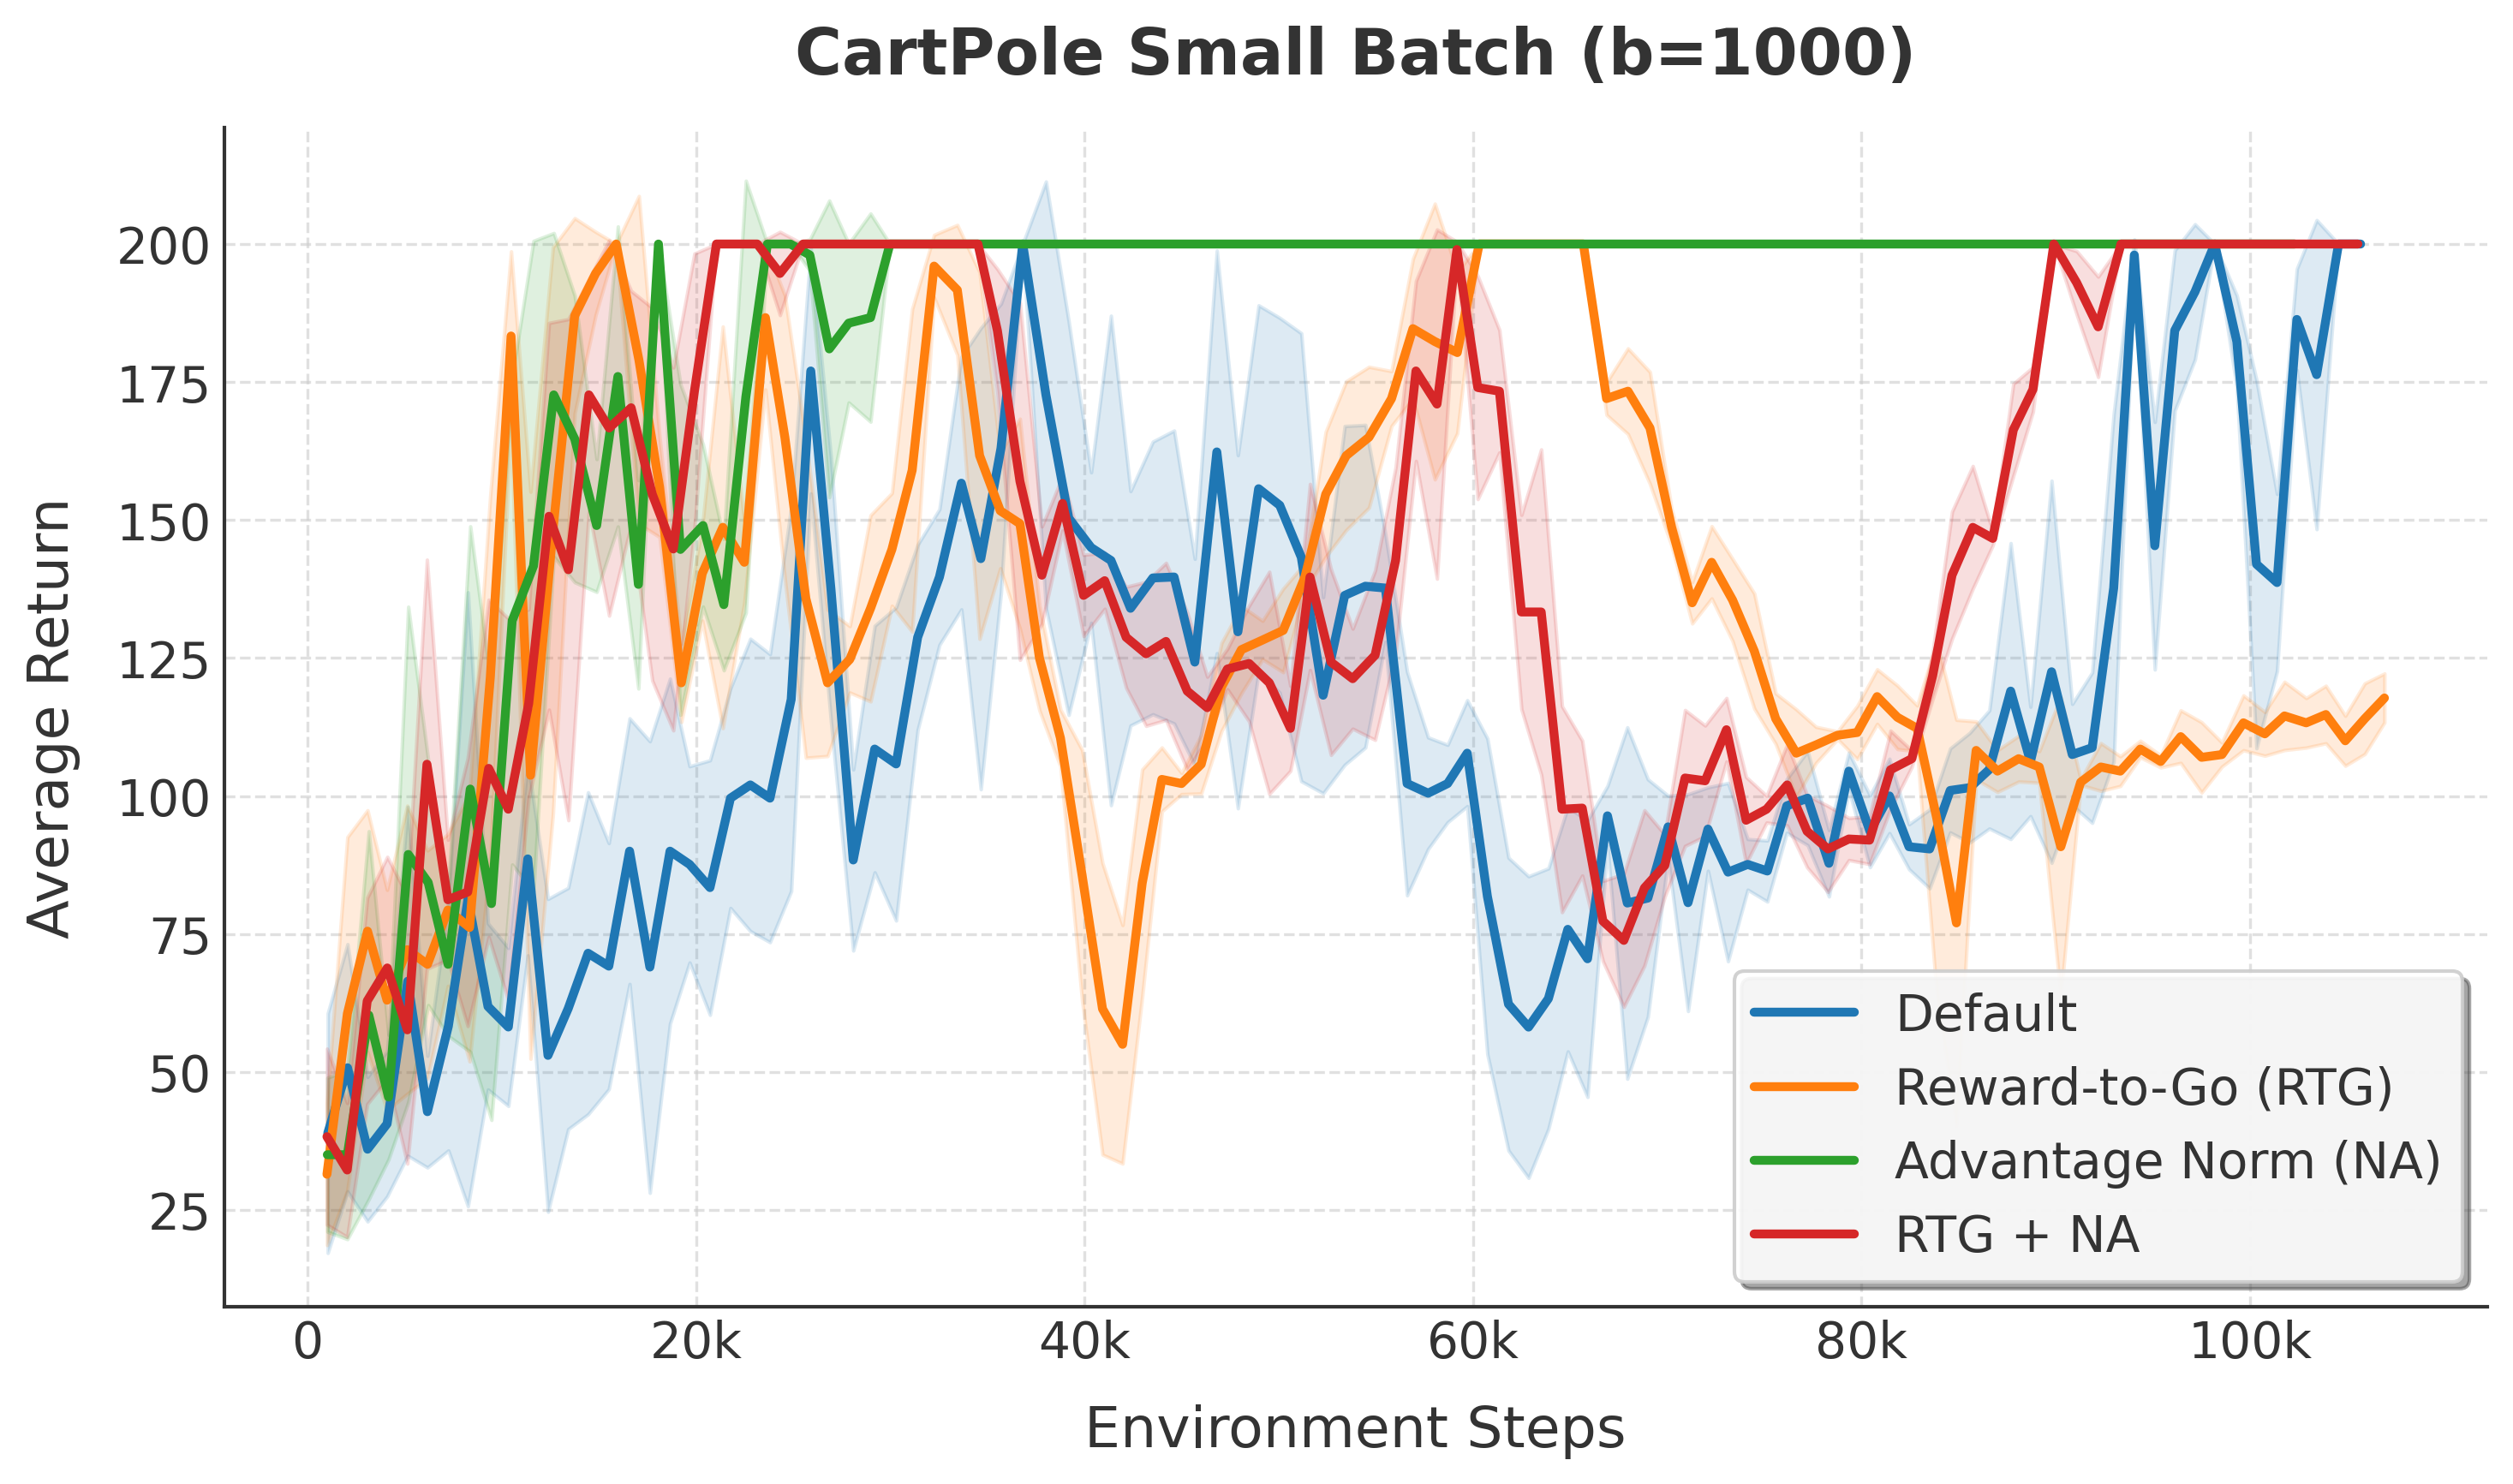

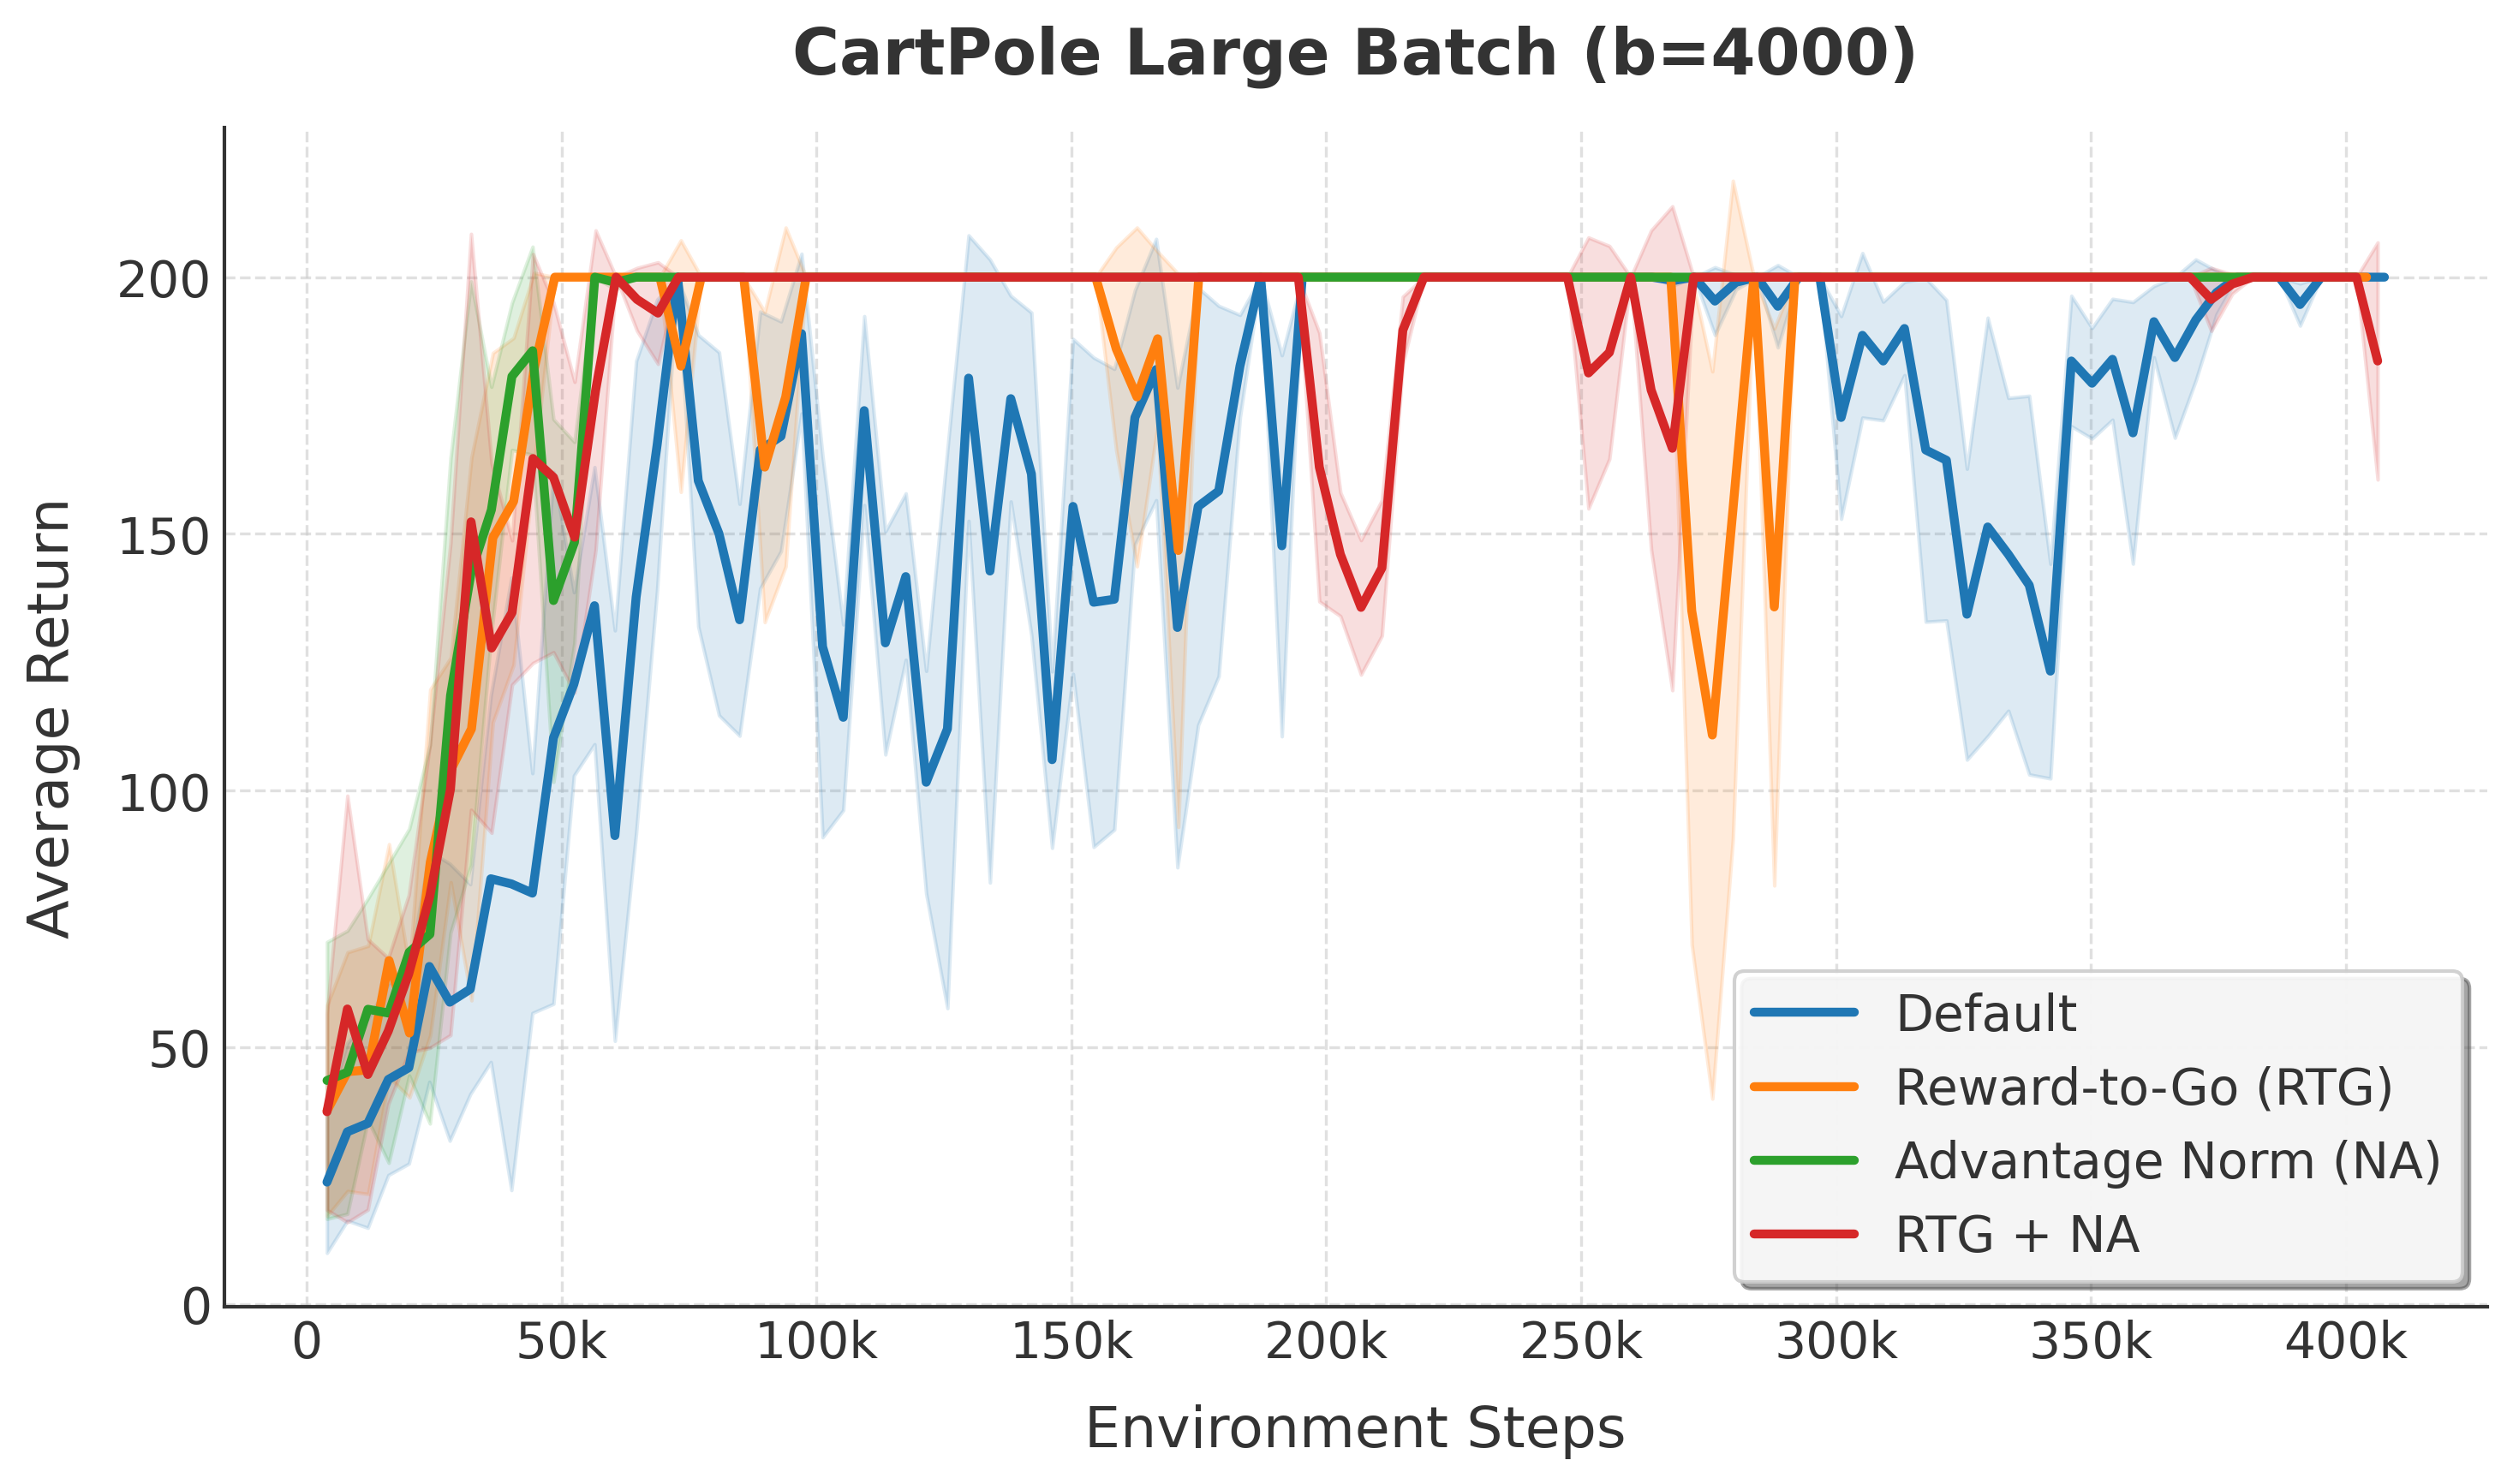

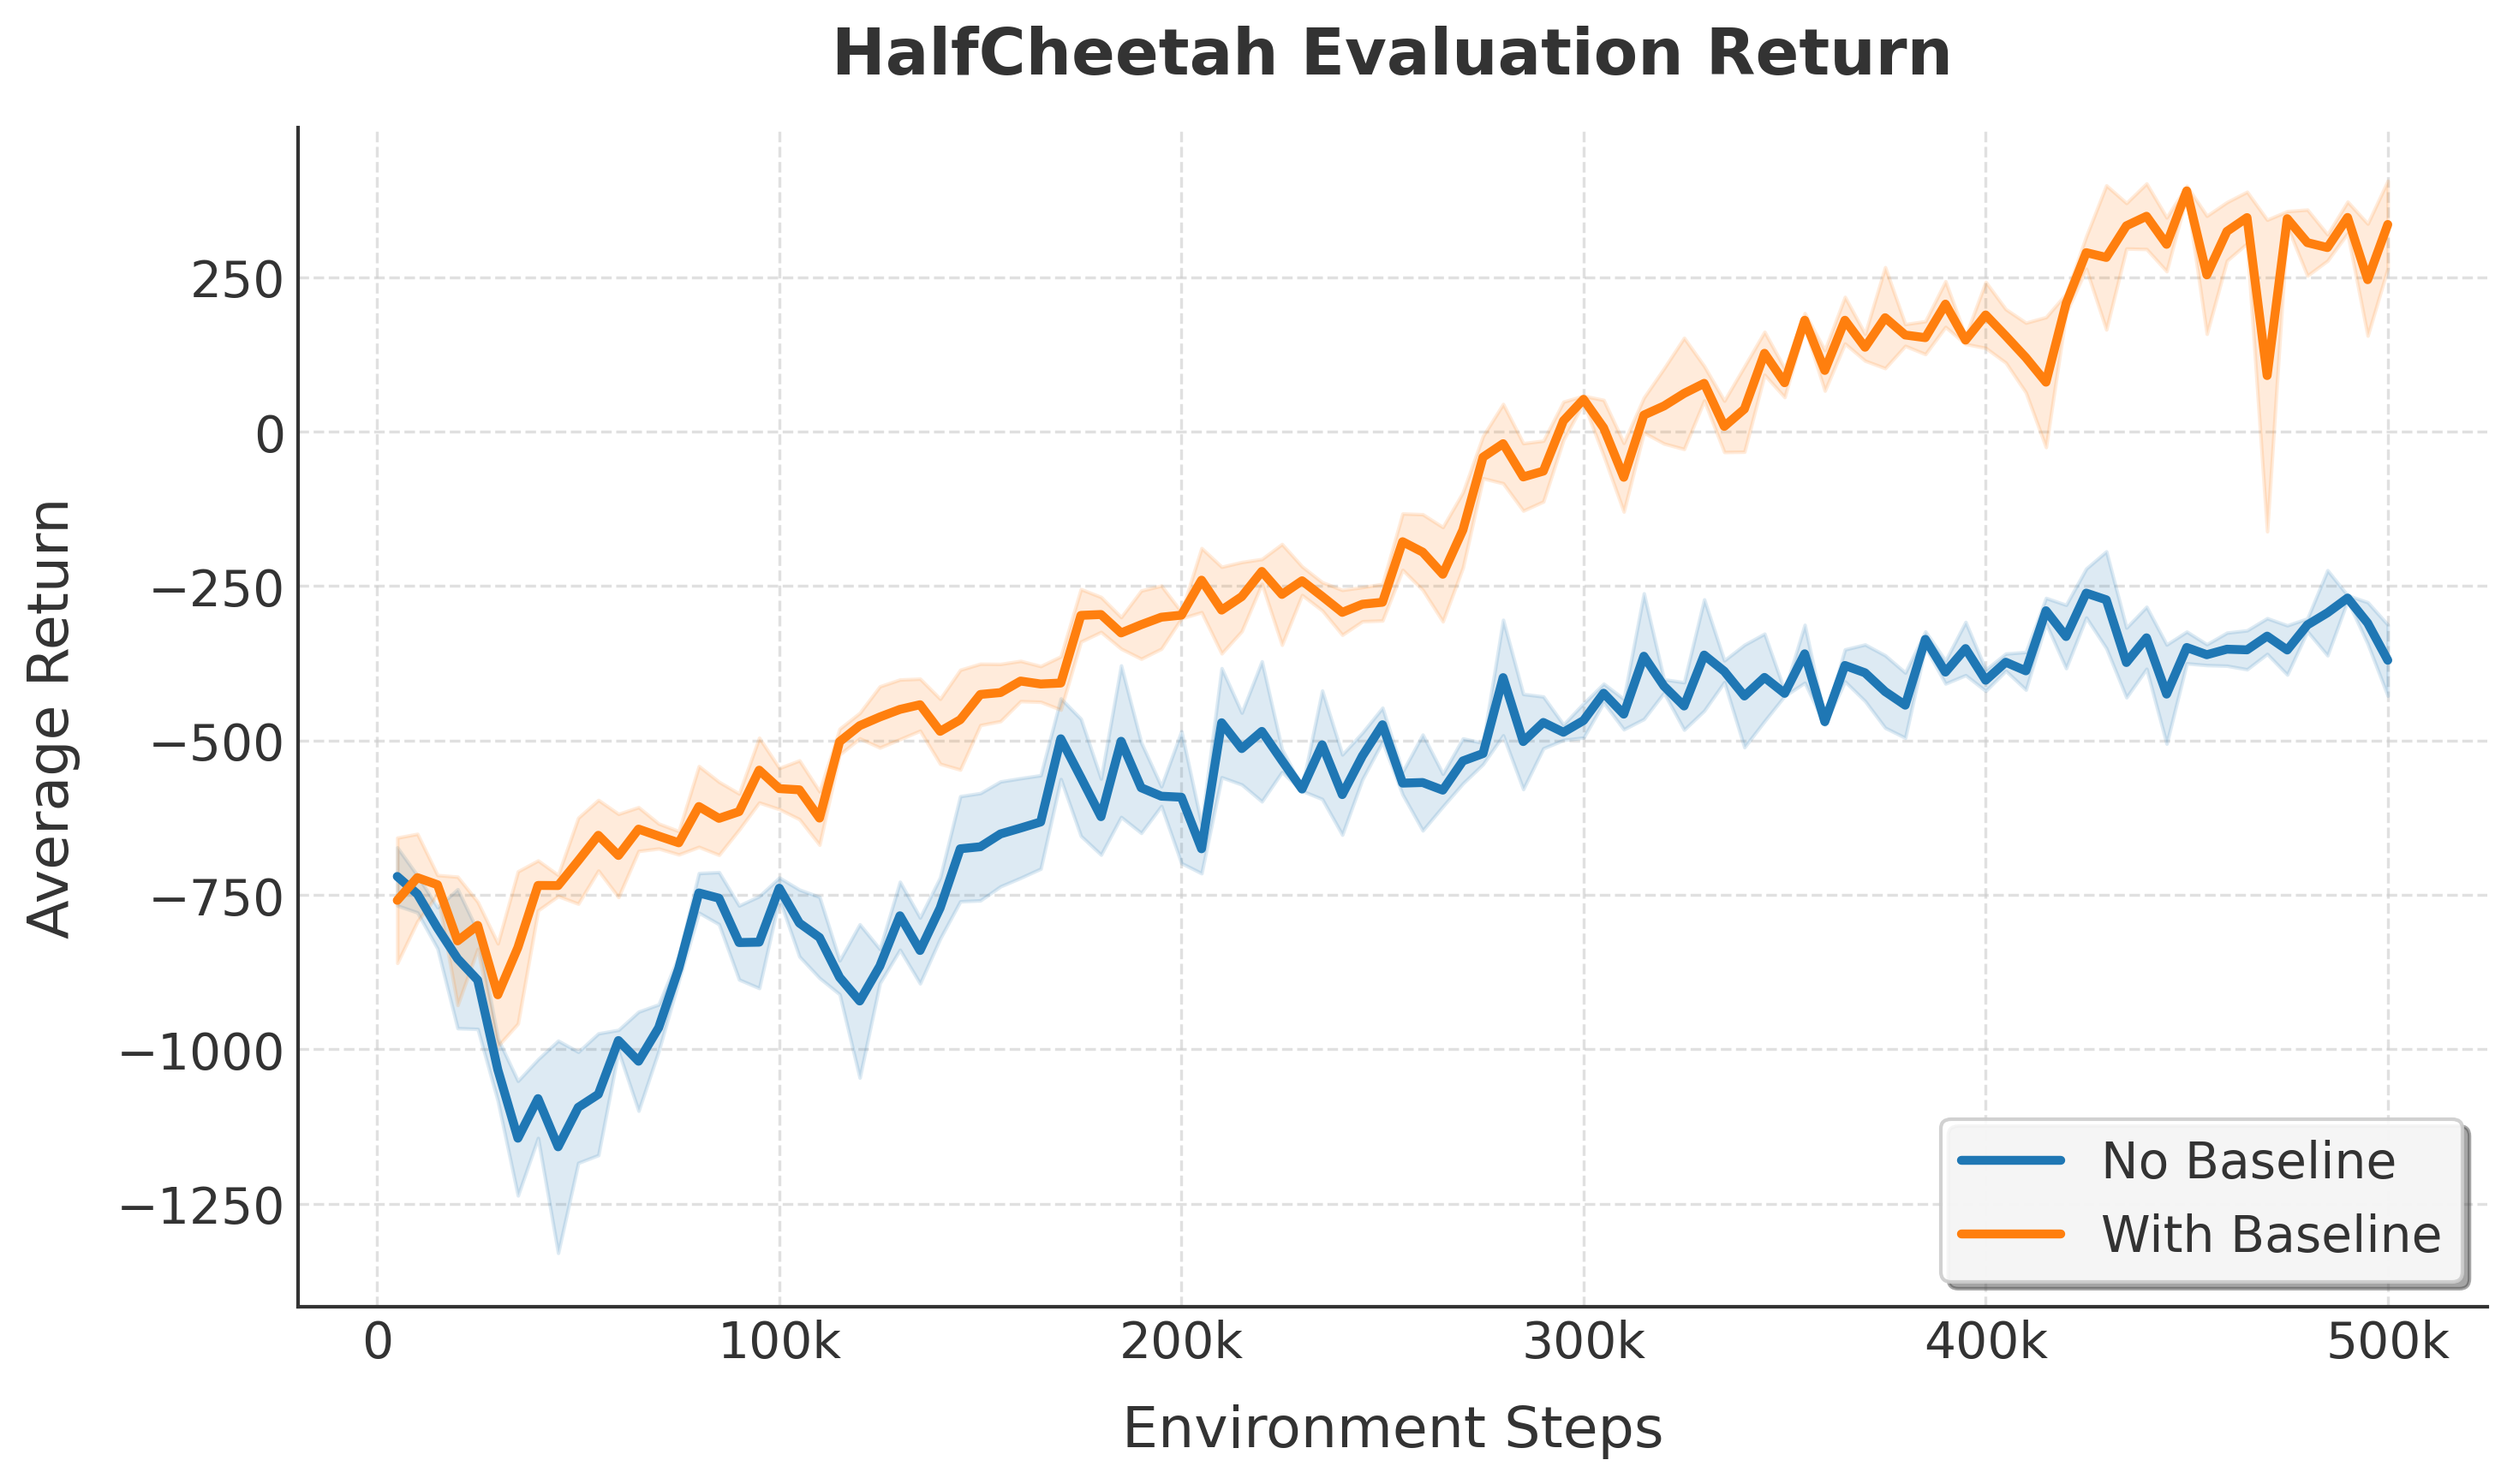

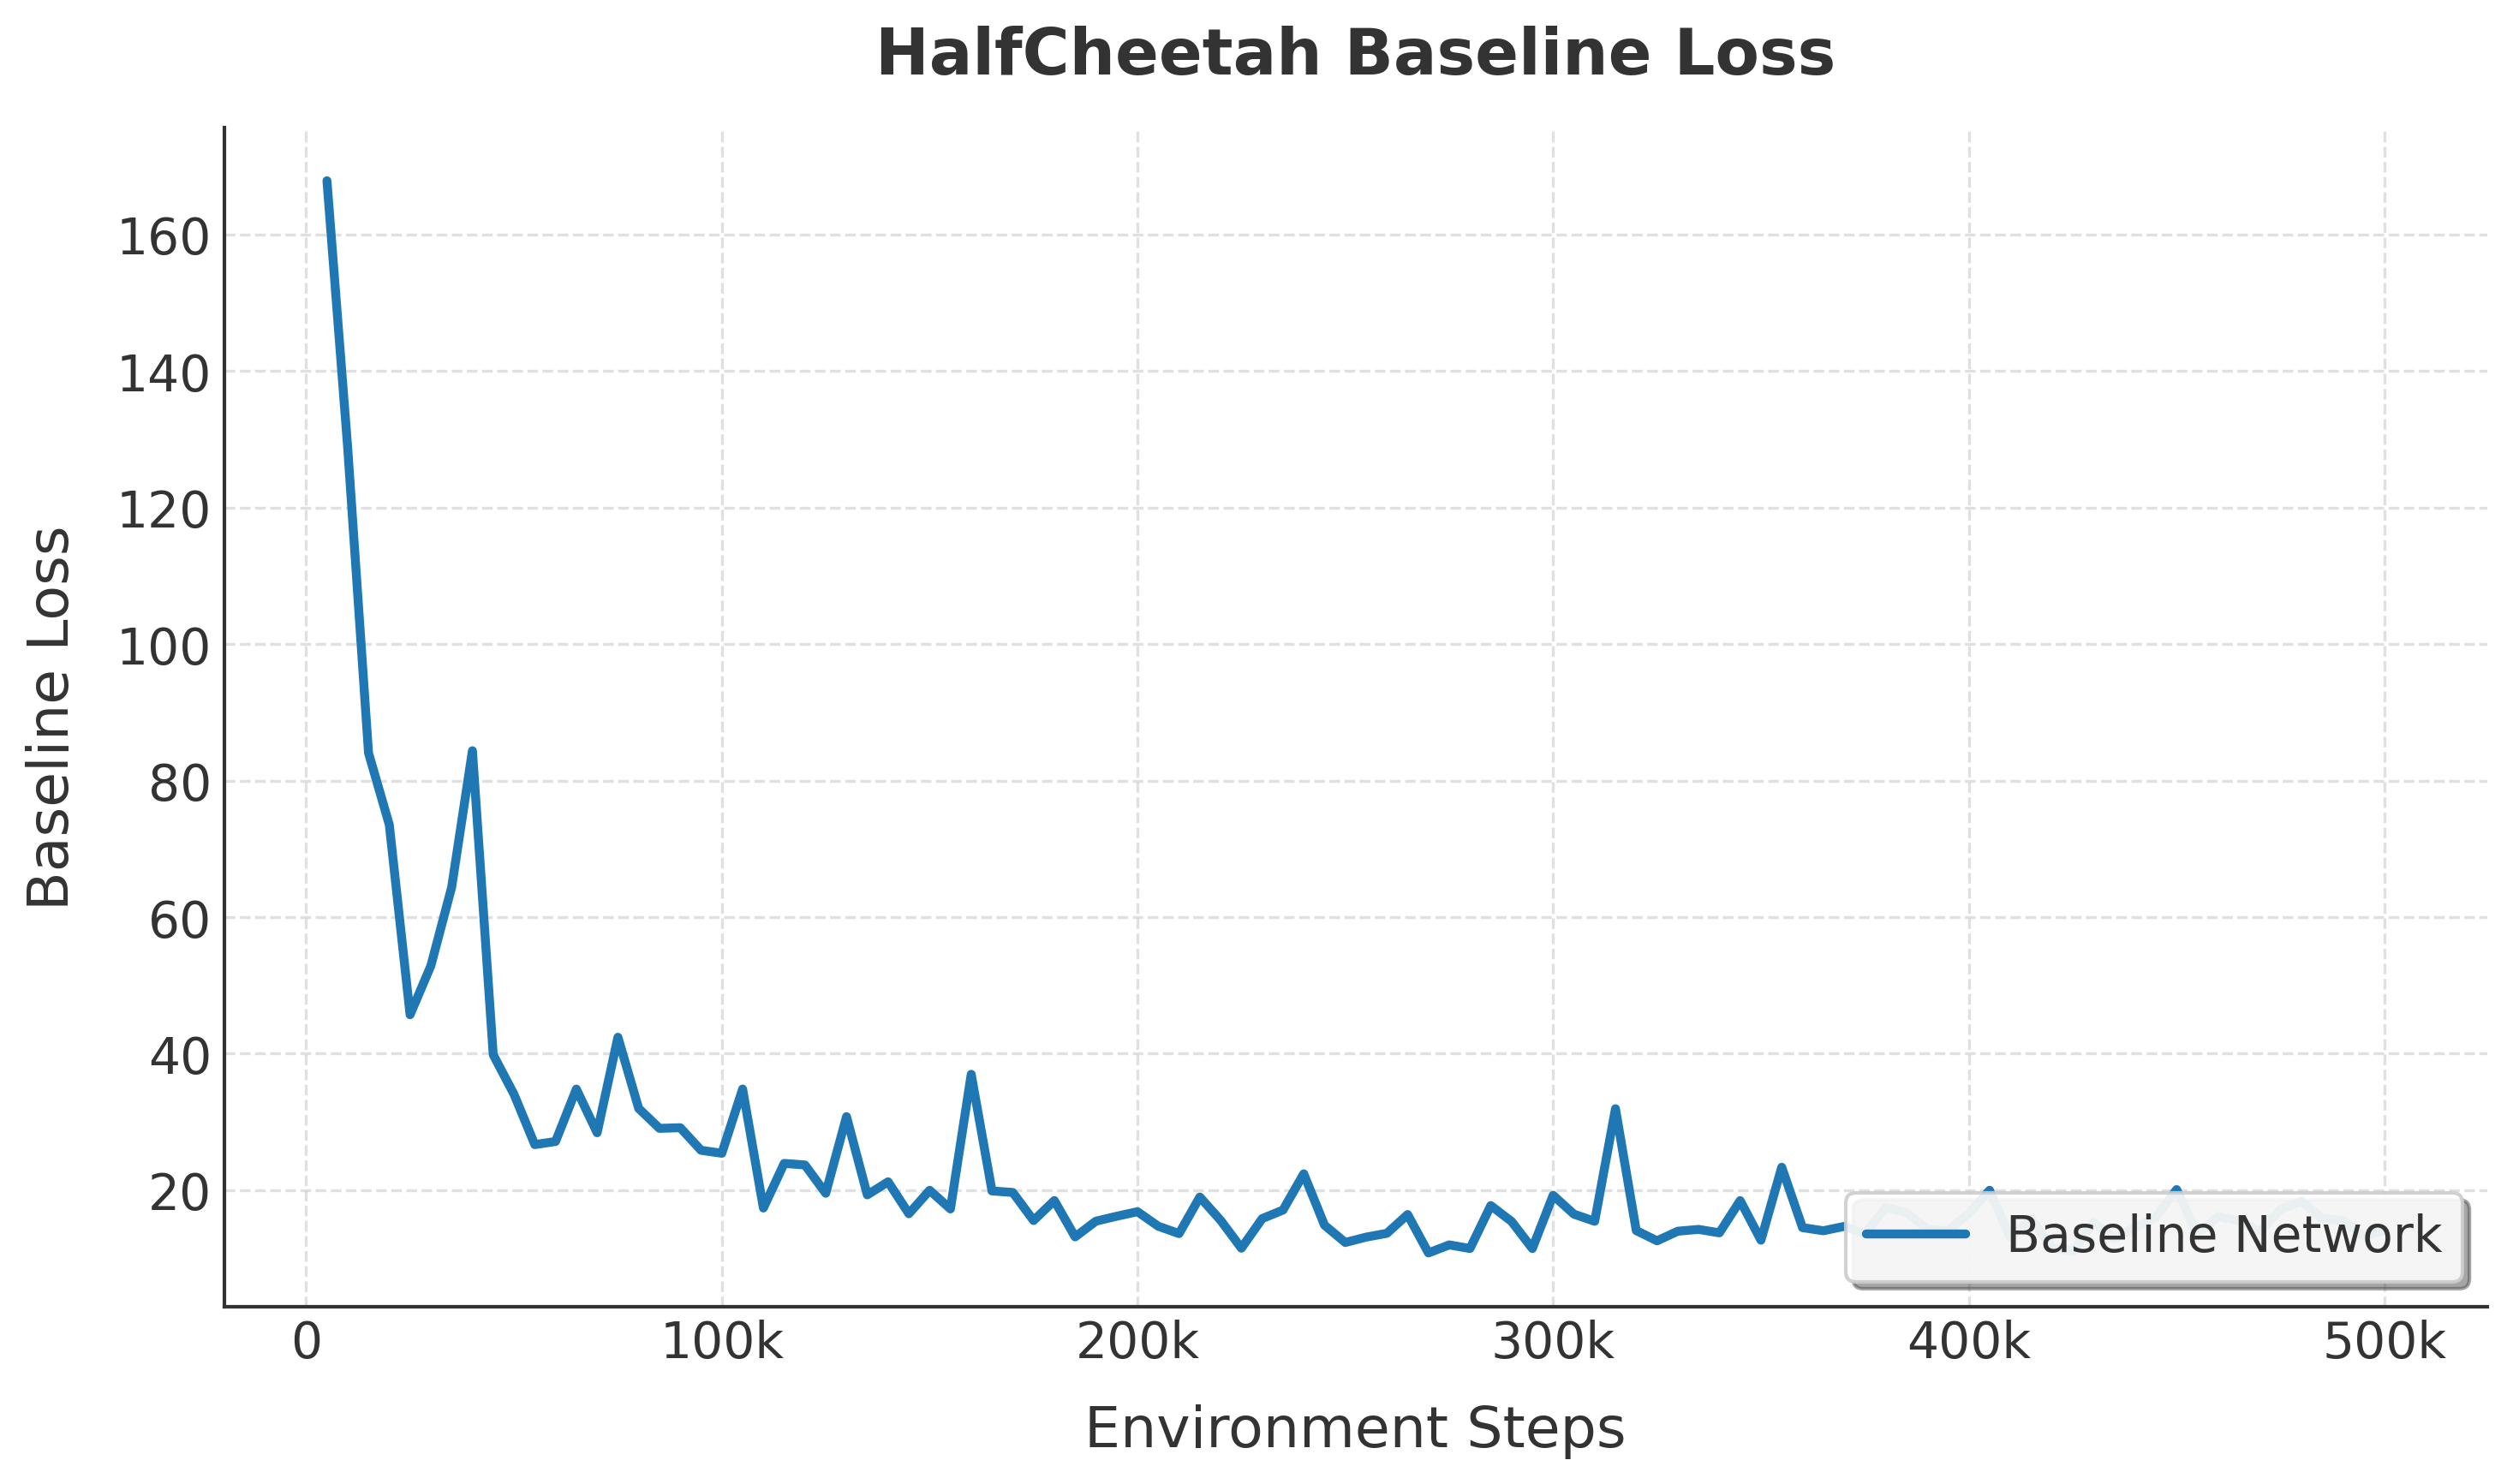

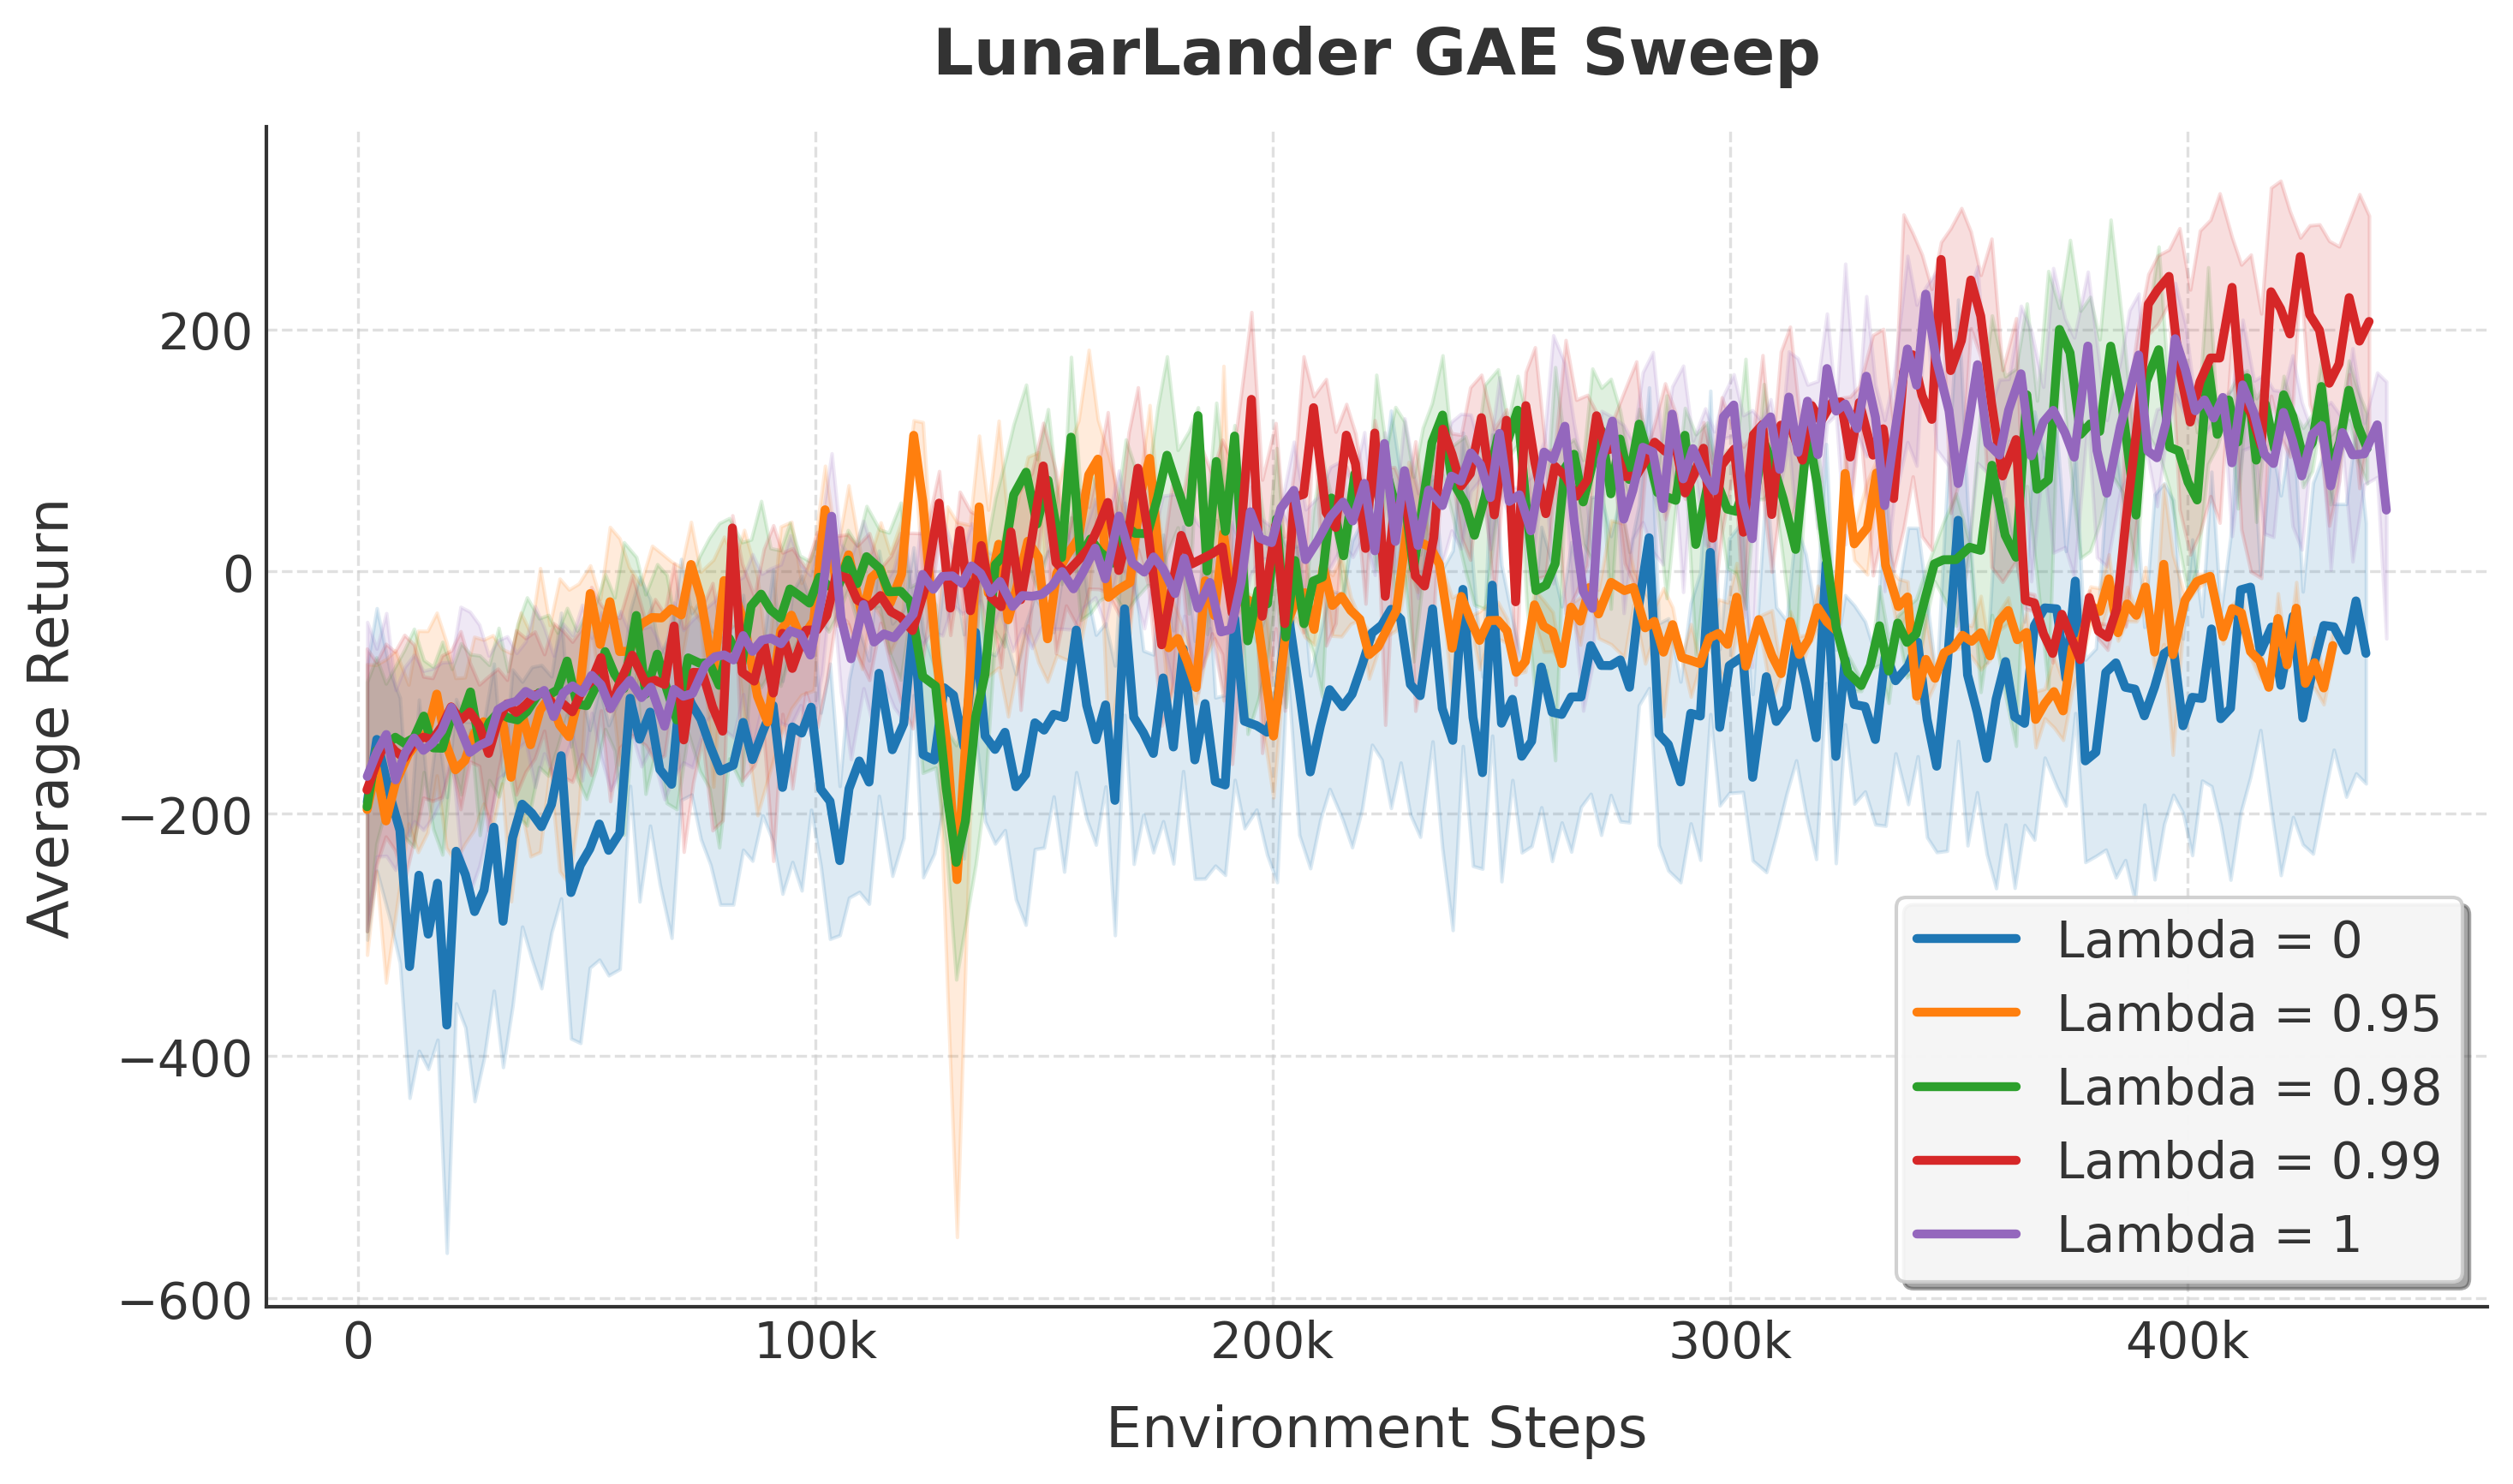

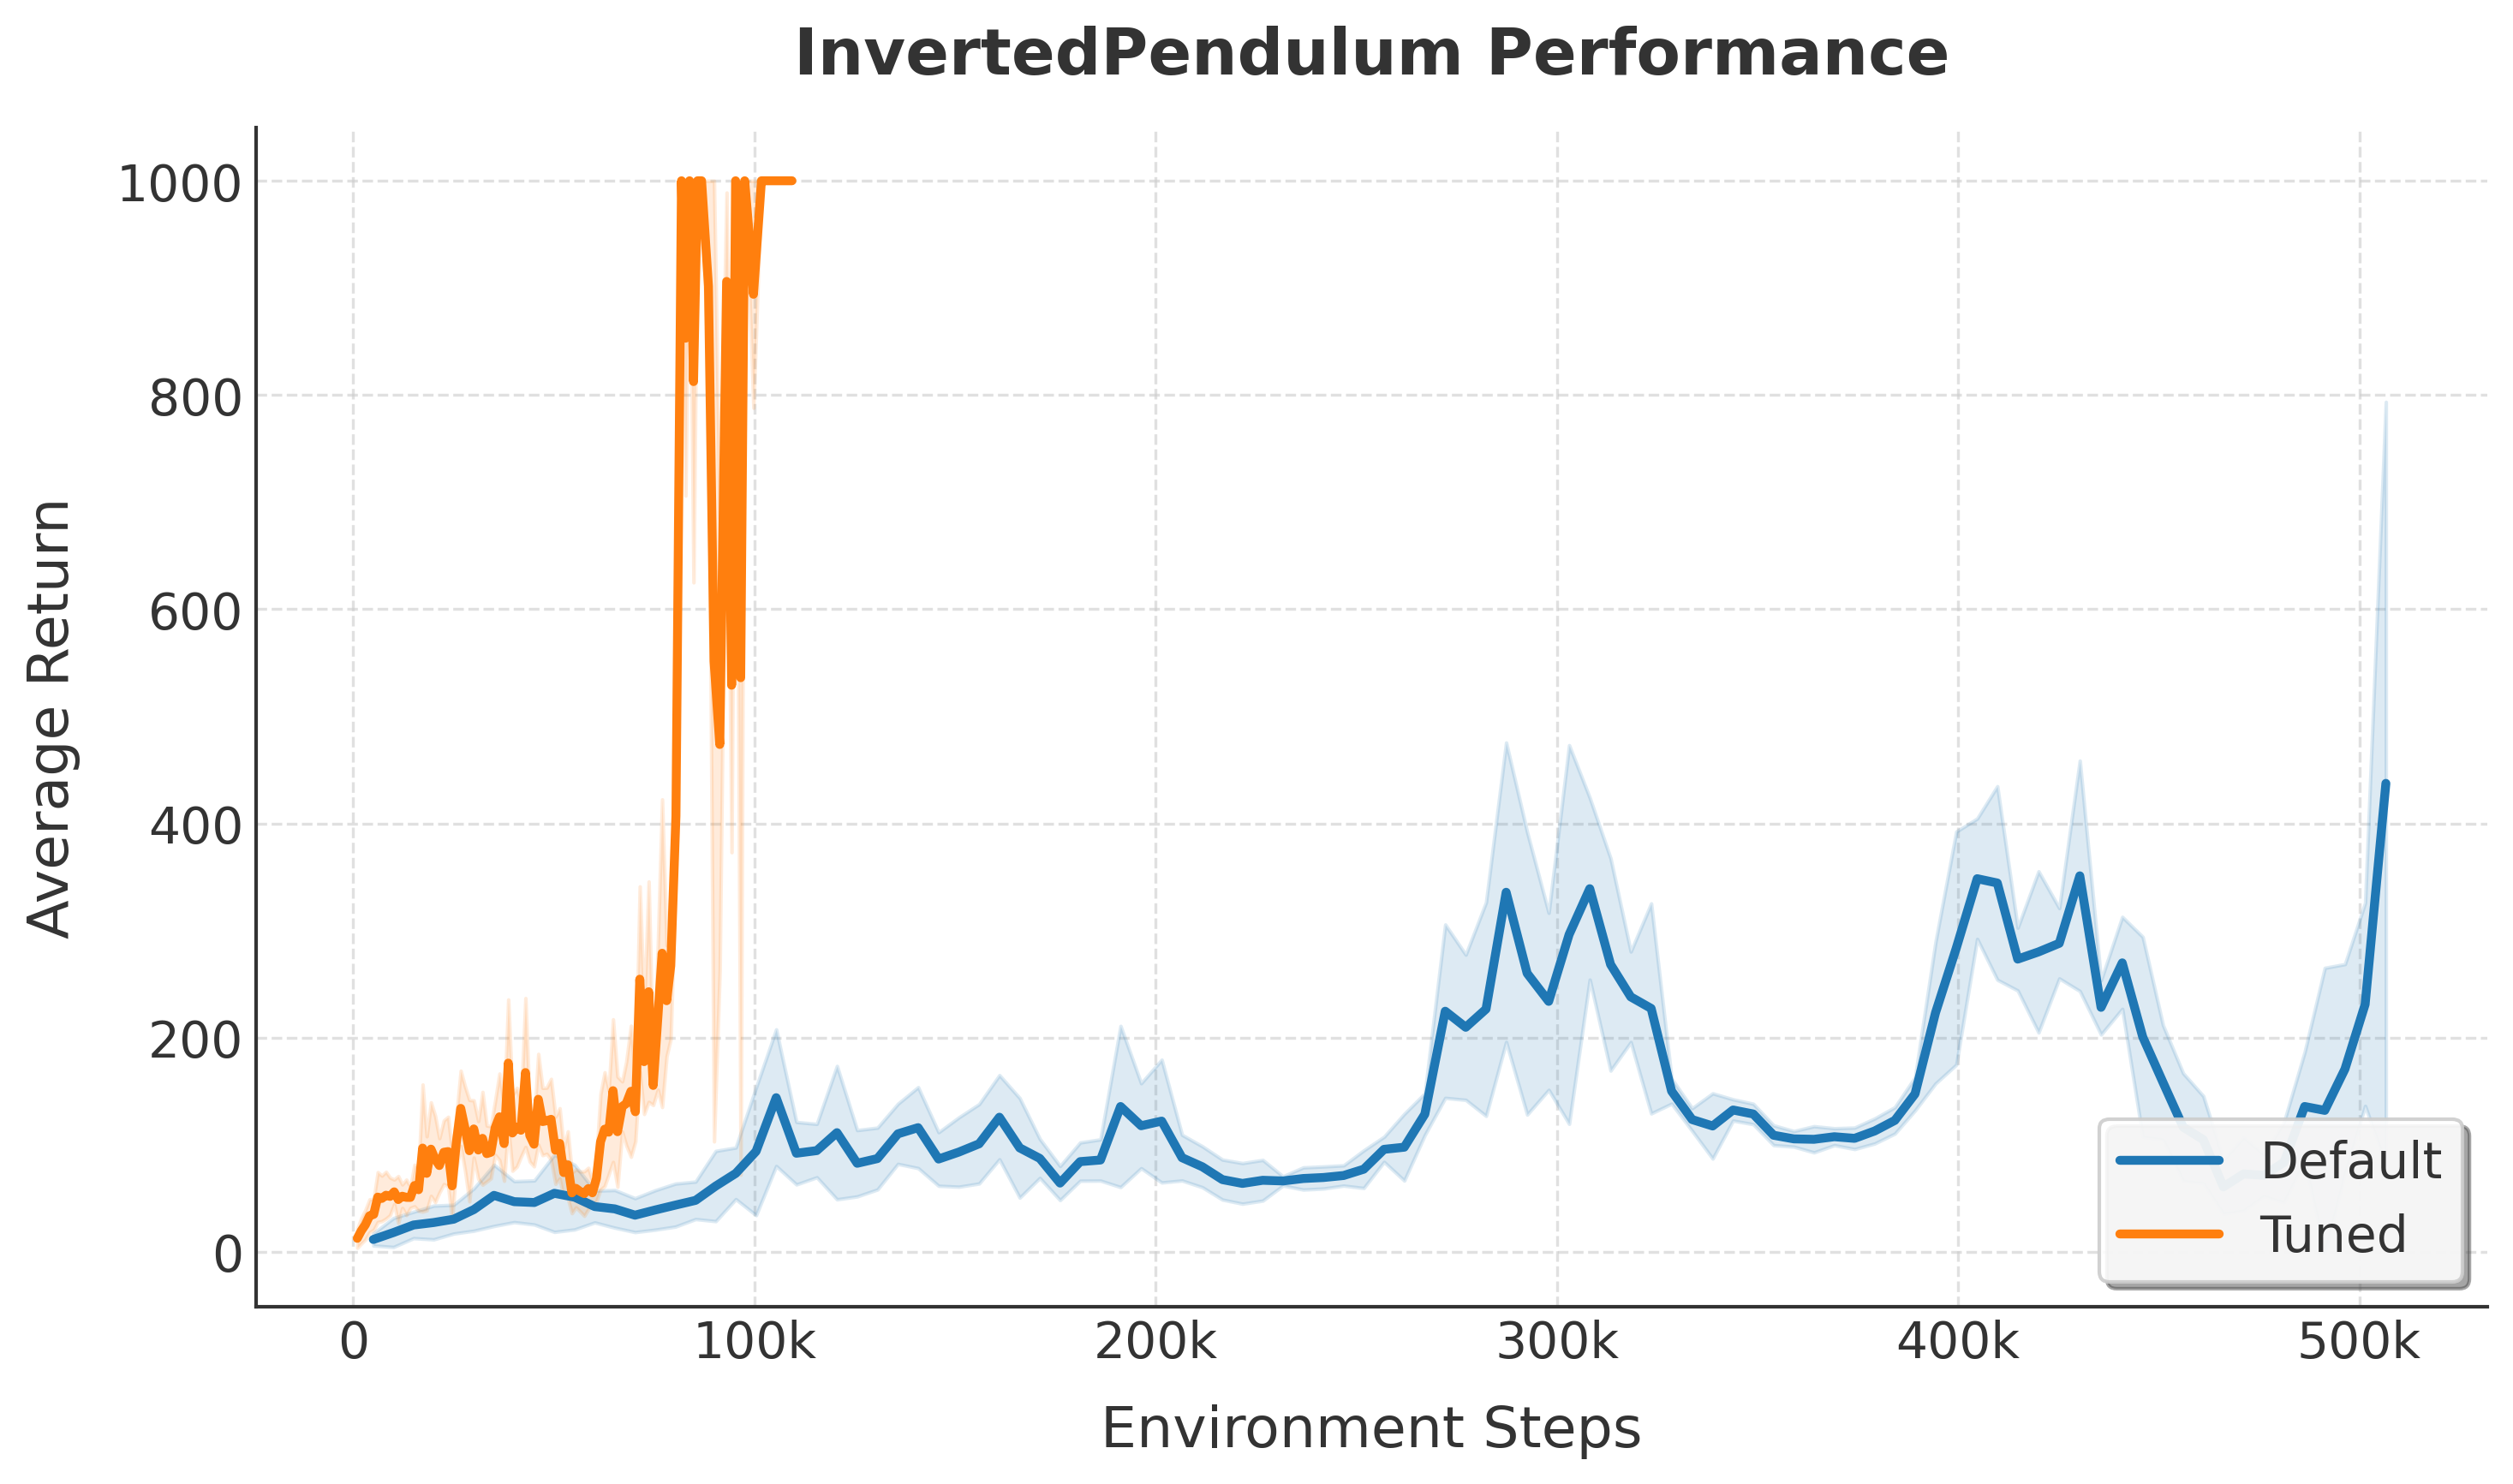

In [9]:
# ==========================================
# Publication-Ready Formatting Configuration
# ==========================================
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'legend.title_fontsize': 14,
    'lines.linewidth': 2.5,
    'figure.figsize': (10, 6),
    'figure.dpi': 300,        # High resolution for LaTeX
    'axes.edgecolor': '#333333',
    'text.color': '#333333',
    'axes.labelcolor': '#333333',
    'xtick.color': '#333333',
    'ytick.color': '#333333'
})

# Color palette for different lines
COLORS = sns.color_palette("tab10")

# Create figures directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

def get_log_file(exp_prefix, base_dir="exp"):
    """Finds the log.csv file matching the experiment prefix."""
    search_pattern = os.path.join(base_dir, f"*{exp_prefix}*", "log.csv")
    matches = glob.glob(search_pattern)
    if not matches:
        print(f"Warning: No log.csv found for {exp_prefix}")
        return None
    return matches[0]

def plot_experiments(experiments, title, filename, y_col="Eval_AverageReturn", x_col="Train_EnvstepsSoFar"):
    """Plots a set of experiments on a single figure with publication-quality formatting."""
    fig, ax = plt.subplots()
    plotted_any = False
    
    # Try to determine the std column based on the y_col name
    std_col = y_col.replace('Average', 'Std') if 'Average' in y_col else None
    
    for idx, (label, exp_prefix) in enumerate(experiments.items()):
        log_file = get_log_file(exp_prefix)
        if log_file:
            df = pd.read_csv(log_file)
            if x_col in df.columns and y_col in df.columns:
                x = df[x_col]
                y = df[y_col]
                color = COLORS[idx % len(COLORS)]
                
                # Plot the main average line
                ax.plot(x, y, label=label, color=color, zorder=3)
                
                # Plot the shaded error band if the standard deviation column exists
                if std_col and std_col in df.columns:
                    std = df[std_col]
                    ax.fill_between(x, y - std, y + std, color=color, alpha=0.15, zorder=2)
                
                plotted_any = True
            else:
                print(f"Columns {x_col} or {y_col} not found in {log_file}")
                
    if plotted_any:
        ax.set_title(title, pad=15, fontweight='bold')
        
        # Format X-axis
        ax.set_xlabel("Environment Steps", labelpad=10)
        # Format X-axis tick labels to show as 'k' (e.g., 100k) for readability
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}k" if x >= 1000 else f"{int(x)}"))
        
        # Format Y-axis
        y_label = "Average Return" if "Return" in y_col else y_col.replace("_", " ")
        ax.set_ylabel(y_label, labelpad=10)
        
        # Legend styling
        ax.legend(loc="lower right", frameon=True, fancybox=True, shadow=True, 
                  framealpha=0.9, edgecolor='#CCCCCC')
        
        # Grid and spine styling
        ax.grid(True, linestyle='--', alpha=0.6, zorder=0)
        sns.despine(ax=ax)

        plt.tight_layout()
        plt.savefig(f"figures/{filename}.png", dpi=300)
        print(f"Saved figures/{filename}.png")

def main():
    # 1. CartPole Small Batch
    cartpole_small = {
        "Default": "CartPole-v0_cartpole_sd",
        "Reward-to-Go (RTG)": "CartPole-v0_cartpole_rtg_sd",
        "Advantage Norm (NA)": "CartPole-v0_cartpole_na_sd",
        "RTG + NA": "CartPole-v0_cartpole_rtg_na_sd"
    }
    plot_experiments(cartpole_small, "CartPole Small Batch (b=1000)", "cartpole_small_batch")

    # 2. CartPole Large Batch
    cartpole_large = {
        "Default": "CartPole-v0_cartpole_lb_sd",
        "Reward-to-Go (RTG)": "CartPole-v0_cartpole_lb_rtg_sd",
        "Advantage Norm (NA)": "CartPole-v0_cartpole_lb_na_sd",
        "RTG + NA": "CartPole-v0_cartpole_lb_rtg_na_sd"
    }
    plot_experiments(cartpole_large, "CartPole Large Batch (b=4000)", "cartpole_large_batch")

    # 3. HalfCheetah Eval Return
    cheetah_eval = {
        "No Baseline": "HalfCheetah-v4_cheetah_sd",
        "With Baseline": "HalfCheetah-v4_cheetah_baseline_sd"
    }
    plot_experiments(cheetah_eval, "HalfCheetah Evaluation Return", "cheetah_eval_return")

    # 4. HalfCheetah Baseline Loss
    cheetah_loss = {
        "Baseline Network": "HalfCheetah-v4_cheetah_baseline_sd"
    }
    # Note: Depending on how you logged it, the column might be 'Baseline Loss' or 'Baseline_Loss'
    plot_experiments(cheetah_loss, "HalfCheetah Baseline Loss", "cheetah_baseline_loss", y_col="Baseline Loss")

    # 5. LunarLander GAE Lambda Sweep
    lunar_lander_gae = {
        "Lambda = 0": "LunarLander-v2_lunar_lander_lambda0_sd",
        "Lambda = 0.95": "LunarLander-v2_lunar_lander_lambda0.95_sd",
        "Lambda = 0.98": "LunarLander-v2_lunar_lander_lambda0.98_sd",
        "Lambda = 0.99": "LunarLander-v2_lunar_lander_lambda0.99_sd",
        "Lambda = 1": "LunarLander-v2_lunar_lander_lambda1_sd"
    }
    plot_experiments(lunar_lander_gae, "LunarLander GAE Sweep", "lunar_lander_gae")

    # 6. InvertedPendulum: Tuned vs Default
    # NOTE: You will need to change the prefix of the tuned one depending on what you named it!
    pendulum = {
        "Default": "InvertedPendulum-v4_pendulum_sd",
        "Tuned": "InvertedPendulum-v4_pendulum_rtg_baseline_na_gae_99_bs_1000"
    }
    plot_experiments(pendulum, "InvertedPendulum Performance", "pendulum_comparison")

if __name__ == "__main__":
    main()